In [1]:
## Importing libraries
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Get a first look at the data

In [2]:
### Import Labor force survey 
## 2556 Q1
LFS_56_Q1, meta_56_Q1 = pyreadstat.read_sav("Data\LFS\LFS 2556 (2013)\LFS Q1 2556\Microdata LFS Q1 2556\Microdata LFS Q1 2556.sav")

In [3]:
LFS_56_Q1

,reg,cwt,area,psu_no,ea_set,samset,mounth,yr,hh_no,member,...,re_no,wage_ty,amount,approx,bonus,ot,oth_mon,re_wk,re_ed,wgt
0,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,1065.8194
1,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,926.1319
2,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,1.0,3.0,...,NaN,4.0,NaN,6000.0,0.0,0.0,0.0,1.0,3.0,1327.5656
3,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,713.0996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226611,5.0,96.0,2.0,54.0,3.0,B,3.0,56.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,503.8714
226612,5.0,96.0,2.0,54.0,3.0,B,3.0,56.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,460.0770
226613,5.0,96.0,2.0,54.0,3.0,B,3.0,56.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,393.3147
226614,5.0,96.0,2.0,54.0,3.0,B,3.0,56.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,376.1351


In [4]:
### What does each column mean
meta_56_Q1.column_names_to_labels

{'reg': None,
 'cwt': None,
 'area': None,
 'psu_no': None,
 'ea_set': None,
 'samset': None,
 'mounth': None,
 'yr': None,
 'hh_no': None,
 'member': None,
 'listing': None,
 'enum': None,
 'no': None,
 'sex': None,
 'age': None,
 'marital': None,
 'grade_a': None,
 'grade_b': None,
 'subject': None,
 'line': None,
 'wk_7day': None,
 'receive': None,
 'occup1': None,
 'occup2': None,
 'occup3': None,
 'occup': None,
 'ind1': None,
 'ind2': None,
 'ind3': None,
 'ind4': None,
 'indus': None,
 'status': None,
 'size': None,
 'main_hr': None,
 'other_hr': None,
 'total_hr': None,
 'more_wk': None,
 'more_hr': None,
 'finding': None,
 're_no': None,
 'wage_ty': None,
 'amount': None,
 'approx': None,
 'bonus': None,
 'ot': None,
 'oth_mon': None,
 're_wk': None,
 're_ed': None,
 'wgt': None}

In [5]:
## Label of each column
meta_56_Q1.variable_to_label

{}

In [6]:
### Value labels (What does each value in each column mean)

meta_56_Q1.value_labels

{}

### Keeping Only Labor Force

Value labels of 're_wk': 'WORK STATUS RECODE'

For 2528 - 2543:
- 01-08: Employed
- 09-12, 14-17: Unemployed
- **19-20, 22-26: Not in labor force** &rarr; 01-18, 21: Labor force
- 13, 18, 21: Waiting for season.

**Note**: must also exclude people age under 15 years old manually.

For 2544 - 2550:
- 01-03: Employed
- 04-05: Unemployed
- **06-07, 09-12: Not in labor force** &rarr; 01-05, 08: Labor force
- 08: Waiting for season.
- 13: Persons under 15 years old

For 2551 - recent:
- 01-03: Employed
- 04-05: Unemployed
- **06-07, 09-13: Not in labor force** &rarr; 01-05, 08: Labor force
- 08: Waiting for season.
- 14: Persons under 15 years old



In [7]:
### Crete functions to exclude people who are not in labor force.
## Excluding people who are not in labor force (2544 - recent)
def exclude_not_LFfrom44(LFS_df): # drop re_wk == 06-07 or >= 09.
    x = LFS_df.drop(LFS_df[(LFS_df["re_wk"] == 6) | (LFS_df["re_wk"] == 7) | (LFS_df["re_wk"] >= 9)].index)
    return x

## Excluding people who are not in labor force (before 2544)
def exclude_not_LFbefore44(LFS_df): # drop re_wk == 19-20 or 22-26
    x = LFS_df.drop(LFS_df[(LFS_df["re_wk"] == 19) | (LFS_df["re_wk"] == 20) | (LFS_df["re_wk"] == 22) | (LFS_df["re_wk"] == 23) | (LFS_df["re_wk"] == 24) | (LFS_df["re_wk"] == 25) | (LFS_df["re_wk"] == 26)].index)
    # drop those under 15 years old
    x = x.drop(x[x["age"] < 15].index)
    return x

In [8]:
## Apply the function to the data (use pipe since the input is a dataframe)
LFS_56_Q1 = LFS_56_Q1.pipe(exclude_not_LFfrom44)

In [9]:
## Check the total labor force (sum wgt)
LFS_56_Q1["wgt"].sum()

# correct!

38501921.0863

## Recoding Variables

### Coding Sector.

From *indus* variable

From 2528 - 2543, the standard is ISIC Rev (4 digits)1:
- Agriculture: 01-04
- Industry: 11-52
- Services: 61-90

From 2544 - 2553, the standard is ISIC Rev 3. (4 digits):
- Agriculture: 01-05
- Industry: 10-45
- Services: 50-99

For 2554, the standard is TSIC 2009 but 4 digits:
- Agriculture: 01-03
- Industry: 05-43
- Services: 45-99

From 2555 - recent years, the standard is TSIC 2009 (5 digits):
- Agriculture: 01-03
- Industry: 05-43
- Services: 45-99

In [10]:
### Define function to code SECTOR (from the first two digits of INDUST)

## function for 2528-2543.
def sector_create_28to43(row): 
    # First, convert INDUST from float to string.
    x = str(row["indus"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan
    
    ## In case x is less than 4 digits, add 0 in front. And use the first two digits.
    elif len(x) < 4:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 4 digits, take it as it is.
    elif len(x) == 4:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-04
    if (x >= 1) & (x <= 4):
        return "Agriculture"
    # Industry: 11-52
    elif (x >= 11) & (x <= 52):
        return "Industry"
    # Services: 61-90
    elif (x >= 61) & (x <= 90):
        return "Services"
    

## function for 2544-2553.
def sector_create_44to53(row):
    # First, convert INDUST from float to string.
    x = str(row["indus"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan
    
    ## In case x is less than 4 digits, add 0 in front. And use the first two digits.
    elif len(x) < 4:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 4 digits, take it as it is.
    elif len(x) == 4:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-05
    if (x >= 1) & (x <= 5):
        return "Agriculture"
    # Industry: 10-45
    elif (x >= 10) & (x <= 45):
        return "Industry"
    # Services: 50-99
    elif (x >= 50) & (x <= 99):
        return "Services"


## function for 2554.
def sector_create_54(row):
    # First, convert INDUST from float to string.
    x = str(row["indus"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan

    ## In case x is less than 4 digits, add 0 in front. And use the first two digits.
    elif len(x) < 4:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 4 digits, take it as it is.
    elif len(x) == 4:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-03
    if (x >= 1) & (x <= 3):
        return "Agriculture"
    # Industry: 05-43
    elif (x >= 5) & (x <= 43):
        return "Industry"
    # Services: 45-99
    elif (x >= 45) & (x <= 99):
        return "Services"
    

## function for 2555-recent.
def sector_create_from55(row):
    # First, convert INDUST from float to string.
    x = str(row["indus"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan
    
    ## In case x is less than 5 digits, add 0 in front. And use the first two digits.
    elif len(x) < 5:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 5 digits, take it as it is.
    elif len(x) == 5:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-03
    if (x >= 1) & (x <= 3):
        return "Agriculture"
    # Industry: 05-43
    elif (x >= 5) & (x <= 43):
        return "Industry"
    # Services: 45-99
    elif (x >= 45) & (x <= 99):
        return "Services"

In [11]:
### Apply the function to the dataframe.
LFS_56_Q1["SECTOR"] = LFS_56_Q1.apply(sector_create_from55, axis = 1)

LFS_56_Q1.head(10)

,reg,cwt,area,psu_no,ea_set,samset,mounth,yr,hh_no,member,...,wage_ty,amount,approx,bonus,ot,oth_mon,re_wk,re_ed,wgt,SECTOR
0,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,1065.8194,Services
1,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,926.1319,Services
2,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,1.0,3.0,...,4.0,NaN,6000.0,0.0,0.0,0.0,1.0,3.0,1327.5656,Services
3,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,713.0996,Services
5,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,1065.8194,Services
6,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,1134.2707,Services
8,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,926.1319,Services
9,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1065.8194,Industry
10,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,926.1319,Industry


### Recoding Education

Value labels of 're_ed': 'EDUCATION RECODE'.

For 2528 - 2543:
- 01-04: Elementary or lower
- 05, 07: Lower secondary education
- 06, 08: Upper secondary or Associate
- 09-10: Bachelor or higher
- if 11
    + if *occup* is >= 71 & <= 74, then Upper secondary or Associate
    + if *occup* is >= 75 & <= 78, then Bachelor or higher
- 12-14: Other or unknown education (excluded from the analysis)

For 2544 - 2549:
- 01-03: Elementary or lower
- 04: Lower secondary education
- 05-10: Upper secondary or Associate
- 11-13: Bachelor or higher
- 14-15: Other or unknown education (excluded from the analysis)

For 2550 - recent:
- 01-03: Elementary or lower
- 04: Lower secondary education
- 05-10: Upper secondary or Associate
- 11-15: Bachelor or higher
- 16-17: Other or unknown education (excluded from the analysis)


In [12]:
### Define fuctions to recode re_ed.
## Regroup re_ed to 6 categories (2528 - 2543)
def EDCODE_NEW_28to43(row):
    if row["re_ed"] < 4:
        return "Elementary or lower"
    elif (row["re_ed"] == 5) | (row["re_ed"] == 7):
        return "Lower secondary"
    elif (row["re_ed"] == 6) | (row["re_ed"] == 8):
        return "Upper secondary or Associate"
    elif (row["re_ed"] == 9) | (row["re_ed"] == 10):
        return "Bachelor or higher"
    elif row["re_ed"] == 11:
        if (row["occup"] >= 74) & (row["occup"] <= 74):
            return "Upper secondary or Associate"
        elif (row["occup"] >= 75) & (row["occup"] <= 78):
            return "Bachelor or higher"
    else:
        return "Other/Unknown"

## Regroup re_ed to 6 categories (2544 - 2549)
def EDCODE_NEW_44to49(row):
    if row["re_ed"] < 3:
        return "Elementary or lower"
    elif row["re_ed"] == 4:
        return "Lower secondary"
    elif (row["re_ed"] >= 5) & (row["re_ed"] <= 10):
        return "Upper secondary or Associate"
    elif (row["re_ed"] >= 11) & (row["re_ed"] <= 13):
        return "Bachelor or higher"
    else: 
        return "Other/Unknown"

## Regroup re_ed to 6 categories (2550 - recent)
def EDCODE_NEW_50(row):
    if row["re_ed"] < 3:
        return "Elementary or lower"
    elif row["re_ed"] == 4:
        return "Lower secondary"
    elif (row["re_ed"] >= 5) & (row["re_ed"] <= 10):
        return "Upper secondary or Associate"
    elif (row["re_ed"] >= 11) & (row["re_ed"] <= 15):
        return "Bachelor or higher"
    else: 
        return "Other/Unknown"

In [13]:
## Apply the function to the dataframe.
LFS_56_Q1["EDCODE_NEW"] = LFS_56_Q1.apply(EDCODE_NEW_50, axis = 1)


In [14]:
LFS_56_Q1

,reg,cwt,area,psu_no,ea_set,samset,mounth,yr,hh_no,member,...,amount,approx,bonus,ot,oth_mon,re_wk,re_ed,wgt,SECTOR,EDCODE_NEW
0,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,11.0,1065.8194,Services,Bachelor or higher
1,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,5.0,926.1319,Services,Upper secondary or Associate
2,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,1.0,3.0,...,NaN,6000.0,0.0,0.0,0.0,1.0,3.0,1327.5656,Services,Other/Unknown
3,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other/Unknown
4,1.0,10.0,1.0,151.0,2.0,A,1.0,56.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,713.0996,Services,Elementary or lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226608,5.0,96.0,2.0,54.0,3.0,B,3.0,56.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,341.3266,Agriculture,Elementary or lower
226609,5.0,96.0,2.0,54.0,3.0,B,3.0,56.0,6.0,8.0,...,NaN,4500.0,0.0,0.0,0.0,1.0,3.0,383.8208,Services,Other/Unknown
226610,5.0,96.0,2.0,54.0,3.0,B,3.0,56.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,1.0,3.0,476.7949,Agriculture,Other/Unknown
226611,5.0,96.0,2.0,54.0,3.0,B,3.0,56.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,1.0,3.0,503.8714,Agriculture,Other/Unknown


## Examine employment in the three broad sectors: agriculture, industry, and services.

### Look at workers of all age groups

In [15]:
### Table of the number of people in each sector by region.
## Tabulate the data.
LFS_56_Q1_SEC_REG = LFS_56_Q1.groupby(["reg", "SECTOR"]).agg({"wgt": "sum"}).reset_index() 

## Create a new column for the percentage of each sector.
LFS_56_Q1_SEC_REG["Percentage"] = LFS_56_Q1_SEC_REG.groupby('reg')["wgt"].apply(lambda x: x / x.sum() * 100).reset_index().wgt


In [16]:
## Compute the total number of people in each sector at the national level.
LFS_56_Q1_SEC_NAT = LFS_56_Q1_SEC_REG.groupby("SECTOR").agg({"wgt": "sum"}).reset_index()

## Create column reg for the national level. Set it to 0. 
LFS_56_Q1_SEC_NAT["reg"] = 0

## Create a new column for the percentage of each sector.
LFS_56_Q1_SEC_NAT["Percentage"] = LFS_56_Q1_SEC_NAT["wgt"]/LFS_56_Q1_SEC_NAT["wgt"].sum() * 100

# Make the order of columns the same as LFS_56_Q1_SEC_REG
LFS_56_Q1_SEC_NAT = LFS_56_Q1_SEC_NAT[LFS_56_Q1_SEC_REG.columns]

In [17]:
## Concatenate the national level data to the regional level data.
LFS_56_Q1_SEC_REG = pd.concat([LFS_56_Q1_SEC_NAT, LFS_56_Q1_SEC_REG]).reset_index(drop=True)

## remove the dataframes that are no longer needed.
del LFS_56_Q1_SEC_NAT

LFS_56_Q1_SEC_REG

,reg,SECTOR,wgt,Percentage
0,0.0,Agriculture,1.189235e+07,31.200190
1,0.0,Industry,9.406667e+06,24.678875
2,0.0,Services,1.681726e+07,44.120935
3,1.0,Agriculture,4.002174e+04,0.762425
4,1.0,Industry,1.345019e+06,25.622991
5,1.0,Services,3.864226e+06,73.614583
6,2.0,Agriculture,2.248091e+06,19.598324
7,2.0,Industry,4.202544e+06,36.636787
8,2.0,Services,5.020196e+06,43.764889
9,3.0,Agriculture,2.971219e+06,45.302086


## Examine education level. 

### Look at labor force of all age groups.

In [18]:
### Tabulate the data. Get the number of people in each education level (5 categories), in each region (5 regions).
## Tabulate the data.
LFS_56_Q1_EDU_REG_TOTAL = LFS_56_Q1.groupby(["reg", "EDCODE_NEW"]).agg({"wgt": "sum"}).reset_index() ## Don't sort by the alphabetical order.

## Exclude the "Other/Unknown" category.
LFS_56_Q1_EDU_REG_TOTAL = LFS_56_Q1_EDU_REG_TOTAL[LFS_56_Q1_EDU_REG_TOTAL["EDCODE_NEW"] != "Other/Unknown"].reset_index(drop=True) ## drop previous index (otherwise it becomes a new column)

## Create a new column for the percentage of each education level in each region.
LFS_56_Q1_EDU_REG_TOTAL["Percentage"] = LFS_56_Q1_EDU_REG_TOTAL.groupby("reg")["wgt"].apply(lambda x: x/x.sum()*100).reset_index().wgt



In [19]:
## Compute the total number of people in each education level at the national level
LFS_56_Q1_EDU_NAT_TOTAL = LFS_56_Q1_EDU_REG_TOTAL.groupby(["EDCODE_NEW"]).agg({"wgt": "sum"}).reset_index()

## Create column reg for the national level. Set it to 0. 
LFS_56_Q1_EDU_NAT_TOTAL["reg"] = 0

## Create a new column for the percentage of each education level
LFS_56_Q1_EDU_NAT_TOTAL["Percentage"] = LFS_56_Q1_EDU_NAT_TOTAL["wgt"]/LFS_56_Q1_EDU_NAT_TOTAL["wgt"].sum()*100

# Make the order of columns the same as LFS_56_Q1_EDU_REG_TOTAL
LFS_56_Q1_EDU_NAT_TOTAL = LFS_56_Q1_EDU_NAT_TOTAL[LFS_56_Q1_EDU_REG_TOTAL.columns]


In [20]:
## Concatenate the national level data to the regional level data.
LFS_56_Q1_EDU_REG_TOTAL = pd.concat([LFS_56_Q1_EDU_NAT_TOTAL, LFS_56_Q1_EDU_REG_TOTAL], axis = 0).reset_index(drop=True) ## drop previous index entirely.

In [21]:

## remove the dataframes that are no longer needed.
del LFS_56_Q1_EDU_NAT_TOTAL

In [22]:
### Sort the table by EDCODE_NEW.
custom_dict_edu = {'Elementary or lower': 0, 'Lower secondary': 1, 'Upper secondary or Associate': 2, 'Bachelor or higher': 3, 'Other/Unknown': 4}

# Convert EDCODE_NEW to an ordered categorical data type
LFS_56_Q1_EDU_REG_TOTAL['EDCODE_NEW'] = pd.Categorical(LFS_56_Q1_EDU_REG_TOTAL['EDCODE_NEW'], categories=custom_dict_edu.keys(), ordered=True)

# Sort the table by EDCODE_NEW and reg
LFS_56_Q1_EDU_REG_TOTAL.sort_values(by=['reg', 'EDCODE_NEW'], inplace=True, ignore_index = True)


In [23]:
LFS_56_Q1_EDU_REG_TOTAL

,reg,EDCODE_NEW,wgt,Percentage
0,0.0,Elementary or lower,1.076333e+07,35.921868
1,0.0,Lower secondary,6.033352e+06,20.135897
2,0.0,Upper secondary or Associate,7.512063e+06,25.070995
3,0.0,Bachelor or higher,5.654421e+06,18.871241
4,1.0,Elementary or lower,5.761996e+05,12.886603
5,1.0,Lower secondary,7.914474e+05,17.700582
6,1.0,Upper secondary or Associate,1.236171e+06,27.646749
7,1.0,Bachelor or higher,1.867489e+06,41.766066
8,2.0,Elementary or lower,2.794547e+06,30.696510
9,2.0,Lower secondary,2.066581e+06,22.700218


## Examine Average Wages in Each Sector.

In [24]:
### Compute weigthed average wage for each sector.
LFS_56_Q1_SEC_WAGE = LFS_56_Q1[LFS_56_Q1.approx != 99999].dropna(subset = ["approx"]).groupby(["reg", "SECTOR"]).apply(lambda x: np.average(x["approx"], weights = x["wgt"])).reset_index(name = "WAGE")

## Compute the average wage for each sector at the national level.
LFS_56_Q1_SEC_WAGE_NAT = LFS_56_Q1[LFS_56_Q1.approx != 99999].dropna(subset = ["approx"]).groupby(["SECTOR"]).apply(lambda x: np.average(x["approx"], weights = x["wgt"])).reset_index(name = "WAGE")

## Create column REG_NEW for the national level. Set it to 0.
LFS_56_Q1_SEC_WAGE_NAT["reg"] = 0

## Make the order of columns the same as LFS_56_Q1_SEC_WAGE
LFS_56_Q1_SEC_WAGE_NAT = LFS_56_Q1_SEC_WAGE_NAT[LFS_56_Q1_SEC_WAGE.columns]

## Concatenate the national level data to the regional level data.
LFS_56_Q1_SEC_WAGE = pd.concat([LFS_56_Q1_SEC_WAGE_NAT, LFS_56_Q1_SEC_WAGE]).reset_index(drop=True)

## remove the dataframes that are no longer needed.
del LFS_56_Q1_SEC_WAGE_NAT

LFS_56_Q1_SEC_WAGE

,reg,SECTOR,WAGE
0,0.0,Agriculture,10956.100928
1,0.0,Industry,12108.694673
2,0.0,Services,18443.418570
3,1.0,Agriculture,7294.644236
4,1.0,Industry,18618.056390
5,1.0,Services,22718.034892
6,2.0,Agriculture,11625.916883
7,2.0,Industry,12321.981422
8,2.0,Services,18132.057156
9,3.0,Agriculture,9173.728590


## Setting up functions for streamling the process on data from all periods.

In [25]:
#### Turning the above code into a function. Must apply (pipe) to the dataframe.
### Function for RECODING, EXCLUDING NON-LABOR FORCE (2555 - recent)

def LFS_from55_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LFfrom44)

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_from55, axis = 1)
        
    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_50, axis = 1)
    
    return LFS_df

In [26]:
### Function for RECODING, EXCLUDING NON-LABOR FORCE 2554
def LFS_54_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LFfrom44)

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_54, axis = 1)

    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_50, axis = 1)

    return LFS_df

In [27]:
### Function for RECODING, EXCLUDING NON-LABOR FORCE (2550 - 2553)
def LFS_50to53_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LFfrom44)

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_44to53, axis = 1)

    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_50, axis = 1)

    return LFS_df

In [28]:
### Function for RECODING, EXCLUDING NON-LABOR FORCE (2544 - 2549)
def LFS_44to49_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LFfrom44)

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_44to53, axis = 1)

    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_44to49, axis = 1)

    return LFS_df

In [29]:
### Function for RECODING, EXCLUDING NON-LABOR FORCE (2528 - 2543)
def LFS_28to43_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LFbefore44)

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_28to43, axis = 1)

    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_28to43, axis = 1)

    return LFS_df

In [30]:
### Function for Tabulate sector for workers of all ages.
def TAB_SEC(LFS):
        ### Number of people in each sector by region.
        LFS_SEC_REG = LFS.groupby(["reg", "SECTOR"]).agg({"wgt": "sum"}).reset_index()

        ## Create a new column for the percentage of each sector.
        LFS_SEC_REG["Percentage"] = LFS_SEC_REG.groupby('reg')["wgt"].apply(lambda x: x / x.sum() * 100).reset_index().wgt

        ## Compute the total number of people in each sector at the national level.
        LFS_SEC_NAT = LFS_SEC_REG.groupby("SECTOR").agg({"wgt": "sum"}).reset_index()

        ## Create column reg for the national level. Set it to 0.
        LFS_SEC_NAT["reg"] = 0

        ## Create a new column for the percentage of each sector.
        LFS_SEC_NAT["Percentage"] = LFS_SEC_NAT["wgt"]/LFS_SEC_NAT["wgt"].sum() * 100

        # Make the order of columns the same as LFS_SEC_REG
        LFS_SEC_NAT = LFS_SEC_NAT[LFS_SEC_REG.columns]

        ## Concatenate the national level data to the regional level data.
        LFS_SEC_REG = pd.concat([LFS_SEC_NAT, LFS_SEC_REG]).reset_index(drop=True)

        return LFS_SEC_REG

In [31]:
### Function for Tabulate education level for workers of all ages.
def TAB_EDU(LFS):
        ### Tabulate the data. Get the number of people in each education level, in each region.
        ## Tabulate the data.
        LFS_EDU_REG_TOTAL = LFS.groupby(["reg", "EDCODE_NEW"]).agg({"wgt": "sum"}).reset_index() ## Don't sort by the alphabetical order.

        ## Exclude the "Other/Unknown" category.
        LFS_EDU_REG_TOTAL = LFS_EDU_REG_TOTAL[LFS_EDU_REG_TOTAL["EDCODE_NEW"] != "Other/Unknown"].reset_index(drop=True) ## drop previous index (otherwise it becomes a new column)

        ## Create a new column for the percentage of each education level in each region.
        LFS_EDU_REG_TOTAL["Percentage"] = LFS_EDU_REG_TOTAL.groupby("reg")["wgt"].apply(lambda x: x/x.sum()*100).reset_index().wgt

        ## Compute the total number of people in each education level at the national level
        LFS_EDU_NAT_TOTAL = LFS_EDU_REG_TOTAL.groupby(["EDCODE_NEW"]).agg({"wgt": "sum"}).reset_index()

        ## Create column reg for the national level. Set it to 0.
        LFS_EDU_NAT_TOTAL["reg"] = 0

        ## Create a new column for the percentage of each education level
        LFS_EDU_NAT_TOTAL["Percentage"] = LFS_EDU_NAT_TOTAL["wgt"]/LFS_EDU_NAT_TOTAL["wgt"].sum()*100

        # Make the order of columns the same as LFS_EDU_REG_TOTAL
        LFS_EDU_NAT_TOTAL = LFS_EDU_NAT_TOTAL[LFS_EDU_REG_TOTAL.columns]

        ## Concatenate the national level data to the regional level data.
        LFS_EDU_REG_TOTAL = pd.concat([LFS_EDU_NAT_TOTAL, LFS_EDU_REG_TOTAL], axis = 0).reset_index(drop=True) ## drop previous index entirely.

        ### Sort the table by EDCODE_NEW.
        custom_dict_edu = {'Elementary or lower': 0, 'Lower secondary': 1, 'Upper secondary or Associate': 2, 'Bachelor or higher': 3, 'Other/Unknown': 4}
                           
        # Convert EDCODE_NEW to an ordered categorical data type
        LFS_EDU_REG_TOTAL['EDCODE_NEW'] = pd.Categorical(LFS_EDU_REG_TOTAL['EDCODE_NEW'], categories=custom_dict_edu.keys(), ordered=True)

        # Sort the table by EDCODE_NEW and reg
        LFS_EDU_REG_TOTAL.sort_values(by=['reg', 'EDCODE_NEW'], inplace=True, ignore_index = True)

        return LFS_EDU_REG_TOTAL

In [32]:
### Function for calculating the average wage for each sector.
def avg_wage(LFS):
    ### Compute weigthed average wage for each sector.
    LFS_SEC_WAGE = LFS[LFS.approx != 99999].dropna(subset = ["approx"]).groupby(["reg", "SECTOR"]).apply(lambda x: np.average(x["approx"], weights = x["wgt"])).reset_index(name = "WAGE")

    ## Compute the average wage for each sector at the national level.
    LFS_SEC_WAGE_NAT = LFS[LFS.approx != 99999].dropna(subset = ["approx"]).groupby(["SECTOR"]).apply(lambda x: np.average(x["approx"], weights = x["wgt"])).reset_index(name = "WAGE")

    ## Create column REG_NEW for the national level. Set it to 0.
    LFS_SEC_WAGE_NAT["reg"] = 0

    ## Make the order of columns the same as LFS_SEC_WAGE
    LFS_SEC_WAGE_NAT = LFS_SEC_WAGE_NAT[LFS_SEC_WAGE.columns]

    ## Concatenate the national level data to the regional level data.
    LFS_SEC_WAGE = pd.concat([LFS_SEC_WAGE_NAT, LFS_SEC_WAGE]).reset_index(drop=True)

    return LFS_SEC_WAGE

## Repeat the same process for data from 2544 to 2563 all quarters. (Have approx in all quarters)

In [33]:
# Creating a dictionary to store tabulation results (dataframes).
LFS_44to63_ALL_AGE_SEC = {}
LFS_44to63_ALL_AGE_EDU = {}
LFS_44to63_WAGE_SEC = {}


### Import Labor force survey
list_year = [2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565]
list_quarter = [1, 2, 3, 4]

root_path = "Data\LFS"

for year in list_year:
    for quarter in list_quarter:
        year_CE = year -543
        filename = root_path + "\LFS " + str(year) + " (" + str(year_CE) + ")\LFS Q" + str(quarter) + " " + str(year) + "\Microdata LFS Q" + str(quarter) + " " + str(year) + "\Microdata LFS Q" + str(quarter) + " " + str(year) + ".SAV"
        Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
        LFS, meta = pyreadstat.read_sav(filename)

        ### Rename to stabilize column names.
        ## REG -> reg
        LFS.rename(columns = {"REG": "reg"}, inplace = True)
        ## wt -> wgt
        LFS.rename(columns = {"wt": "wgt"}, inplace = True)
        ## Weight -> wgt
        LFS.rename(columns = {"Weight": "wgt"}, inplace = True)
        ## WEIGHT -> wgt
        LFS.rename(columns = {"WEIGHT": "wgt"}, inplace = True)
        ## WT -> wgt
        LFS.rename(columns = {"WT": "wgt"}, inplace = True)
        ## WGT -> wgt
        LFS.rename(columns = {"WGT": "wgt"}, inplace = True)
        ## Weight1 -> wgt
        LFS.rename(columns = {"Weight1": "wgt"}, inplace = True)
        ## WGT_REG -> wgt
        LFS.rename(columns = {"WGT_REG": "wgt"}, inplace = True)
        ## RE_WK -> re_wk
        LFS.rename(columns = {"RE_WK": "re_wk"}, inplace = True)
        ## WKCODE -> re_wk
        LFS.rename(columns = {"WKCODE": "re_wk"}, inplace = True)
        ## RE_ED -> re_ed
        LFS.rename(columns = {"RE_ED": "re_ed"}, inplace = True)
        ## EDCODE -> re_ed
        LFS.rename(columns = {"EDCODE": "re_ed"}, inplace = True)
        ## CWT -> CWD
        LFS.rename(columns = {"CWT": "CWD"}, inplace = True)
        ## INDUS -> indus
        LFS.rename(columns = {"INDUS": "indus"}, inplace = True)
        ## INDUST -> indus
        LFS.rename(columns = {"INDUST": "indus"}, inplace = True)
        ## INDUSTRY -> indus
        LFS.rename(columns = {"INDUSTRY": "indus"}, inplace = True)
        ## OCCPTN -> occup
        LFS.rename(columns = {"OCCPTN": "occup"}, inplace = True)
        ## APPROX -> approx
        LFS.rename(columns = {"APPROX": "approx"}, inplace = True)
        ## PERMONTH -> approx
        LFS.rename(columns = {"PERMONTH": "approx"}, inplace = True)
        ## AGE -> age
        LFS.rename(columns = {"AGE": "age"}, inplace = True)

        ###### Apply created functions.
        ### Clean the data.
        LFS = LFS.pipe(LFS_from55_clean)

        ### Tabulate the data.
        LFS_44to63_ALL_AGE_SEC[Data_Time] = LFS.pipe(TAB_SEC)
        LFS_44to63_ALL_AGE_EDU[Data_Time] = LFS.pipe(TAB_EDU)

        ### Compute average wage for each sector.
        LFS_44to63_WAGE_SEC[Data_Time] = LFS.pipe(avg_wage)

In [34]:
### Create a function to annualize the quarterly data.
def annualize(LFS_dict, column_name):
    ## Create empty dictionary to store data in each year.
    LFS_annual_data = {}
    for year in list_year:
        quarter = 1
        Value_all_Q = pd.DataFrame()
        while quarter <= 4:
            Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
            quarterly_data = LFS_dict[Data_Time]

            ## Collect WT of each quarter as a column.
            Value_all_Q[Data_Time] = quarterly_data[column_name]
            ## Move to the next quarter.
            quarter += 1 

        ## Average the quarterly data.
        Value_all_Q[column_name] = Value_all_Q.mean(axis = 1)
        ## Denote the year.
        Value_all_Q["Year"] = year

        ## Concat with the original df to have regions and sectors/edu.
        Value_all_Q = pd.concat([quarterly_data.iloc[:,0:2], Value_all_Q[["Year" ,column_name]]], axis = 1)

        ## Store the annual data in the dictionary.
        LFS_annual_data[str(year)] = Value_all_Q

    return LFS_annual_data

In [35]:
### Annualize the data. Make dictionaries.
## Total Number.
LFS44to65_ALL_AGE_SEC_annual_num = annualize(LFS_44to63_ALL_AGE_SEC, "wgt")
LFS44to65_ALL_AGE_EDU_annual_num = annualize(LFS_44to63_ALL_AGE_EDU, "wgt")

## Percentage.
LFS44to65_ALL_AGE_SEC_annual_pct = annualize(LFS_44to63_ALL_AGE_SEC, "Percentage")
LFS44to65_ALL_AGE_EDU_annual_pct = annualize(LFS_44to63_ALL_AGE_EDU, "Percentage")

## Average wage.
LFS44to65_WAGE_SEC_annual = annualize(LFS_44to63_WAGE_SEC, "WAGE")


## Repeat the same process for data from 2541 to 2543 all quarters. Have 4 quarters. But only the first and the third quarter have data on BAHT_PER_DAY.

### EDU and SECTOR

In [39]:
# Creating a dictionary to store tabulation results (dataframes).
LFS_41to43_ALL_AGE_SEC = {}
LFS_41to43_ALL_AGE_EDU = {}

### Import Labor force survey
list_year = [2541, 2542, 2543]
list_quarter = [1, 2, 3, 4]

root_path = "Data\LFS"

for year in list_year:
    for quarter in list_quarter:
        year_CE = year -543
        filename = root_path + "\LFS " + str(year) + " (" + str(year_CE) + ")\LFS Q" + str(quarter) + " " + str(year) + "\Microdata LFS Q" + str(quarter) + " " + str(year) + "\Microdata LFS Q" + str(quarter) + " " + str(year) + ".SAV"
        Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
        LFS, meta = pyreadstat.read_sav(filename)

        ### Rename to stabilize column names.
        ## REG -> reg
        LFS.rename(columns = {"REG": "reg"}, inplace = True)
        ## wt -> wgt
        LFS.rename(columns = {"wt": "wgt"}, inplace = True)
        ## Weight -> wgt
        LFS.rename(columns = {"Weight": "wgt"}, inplace = True)
        ## WEIGHT -> wgt
        LFS.rename(columns = {"WEIGHT": "wgt"}, inplace = True)
        ## WT -> wgt
        LFS.rename(columns = {"WT": "wgt"}, inplace = True)
        ## WGT -> wgt
        LFS.rename(columns = {"WGT": "wgt"}, inplace = True)
        ## Weight1 -> wgt
        LFS.rename(columns = {"Weight1": "wgt"}, inplace = True)
        ## WGT_REG -> wgt
        LFS.rename(columns = {"WGT_REG": "wgt"}, inplace = True)
        ## RE_WK -> re_wk
        LFS.rename(columns = {"RE_WK": "re_wk"}, inplace = True)
        ## WKCODE -> re_wk
        LFS.rename(columns = {"WKCODE": "re_wk"}, inplace = True)
        ## RE_ED -> re_ed
        LFS.rename(columns = {"RE_ED": "re_ed"}, inplace = True)
        ## EDCODE -> re_ed
        LFS.rename(columns = {"EDCODE": "re_ed"}, inplace = True)
        ## CWT -> CWD
        LFS.rename(columns = {"CWT": "CWD"}, inplace = True)
        ## INDUS -> indus
        LFS.rename(columns = {"INDUS": "indus"}, inplace = True)
        ## INDUST -> indus
        LFS.rename(columns = {"INDUST": "indus"}, inplace = True)
        ## INDUSTRY -> indus
        LFS.rename(columns = {"INDUSTRY": "indus"}, inplace = True)
        ## OCCPTN -> occup
        LFS.rename(columns = {"OCCPTN": "occup"}, inplace = True)
        ## APPROX -> approx
        LFS.rename(columns = {"APPROX": "approx"}, inplace = True)
        ## PERMONTH -> approx
        LFS.rename(columns = {"PERMONTH": "approx"}, inplace = True)
        ## AGE -> age
        LFS.rename(columns = {"AGE": "age"}, inplace = True)

        ###### Apply created functions.
        ### Clean the data.
        LFS = LFS.pipe(LFS_28to43_clean)

        ### Tabulate the data.
        LFS_41to43_ALL_AGE_SEC[Data_Time] = LFS.pipe(TAB_SEC)
        LFS_41to43_ALL_AGE_EDU[Data_Time] = LFS.pipe(TAB_EDU)


In [40]:
### Annualize the data. Make dictionaries.
## Total Number.
LFS41to43_ALL_AGE_SEC_annual_num = annualize(LFS_41to43_ALL_AGE_SEC, "wgt")
LFS41to43_ALL_AGE_EDU_annual_num = annualize(LFS_41to43_ALL_AGE_EDU, "wgt")

## Percentage.
LFS41to43_ALL_AGE_SEC_annual_pct = annualize(LFS_41to43_ALL_AGE_SEC, "Percentage")
LFS41to43_ALL_AGE_EDU_annual_pct = annualize(LFS_41to43_ALL_AGE_EDU, "Percentage")

In [ ]:
### Combine dictionaries into one.
LFS_ALL_AGE_SEC_annual_num = {**LFS41to43_ALL_AGE_SEC_annual_num, **LFS44to65_ALL_AGE_SEC_annual_num}
LFS_ALL_AGE_EDU_annual_num = {**LFS41to43_ALL_AGE_EDU_annual_num, **LFS44to65_ALL_AGE_EDU_annual_num}
LFS_ALL_AGE_SEC_annual_pct = {**LFS41to43_ALL_AGE_SEC_annual_pct, **LFS44to65_ALL_AGE_SEC_annual_pct}
LFS_ALL_AGE_EDU_annual_pct = {**LFS41to43_ALL_AGE_EDU_annual_pct, **LFS44to65_ALL_AGE_EDU_annual_pct}

## Repeat the same process for data from 2536. Have 2 rounds (R1 and R3)

### EDU and SECTOR

In [44]:
# Creating a dictionary to store tabulation results (dataframes).
LFS_36_ALL_AGE_SEC = {}
LFS_36_ALL_AGE_EDU = {}

### Import Labor force survey
list_year = [2536]
list_round = [1, 3]

root_path = "Data\LFS"

for year in list_year:
    for round in list_round:
        year_CE = year -543
        filename = root_path + "\LFS " + str(year) + " (" + str(year_CE) + ")\LFS R" + str(round) + " " + str(year) + "\Microdata LFS R" + str(round) + " " + str(year) + "\Microdata LFS R" + str(round) + " " + str(year) + ".SAV"
        Data_Time = "LFS_" + str(year) + "_R" + str(round)
        LFS, meta = pyreadstat.read_sav(filename)

        ### Rename to stabilize column names.
        ## REG -> reg
        LFS.rename(columns = {"REG": "reg"}, inplace = True)
        ## wt -> wgt
        LFS.rename(columns = {"wt": "wgt"}, inplace = True)
        ## Weight -> wgt
        LFS.rename(columns = {"Weight": "wgt"}, inplace = True)
        ## WEIGHT -> wgt
        LFS.rename(columns = {"WEIGHT": "wgt"}, inplace = True)
        ## WT -> wgt
        LFS.rename(columns = {"WT": "wgt"}, inplace = True)
        ## WGT -> wgt
        LFS.rename(columns = {"WGT": "wgt"}, inplace = True)
        ## Weight1 -> wgt
        LFS.rename(columns = {"Weight1": "wgt"}, inplace = True)
        ## WGT_REG -> wgt
        LFS.rename(columns = {"WGT_REG": "wgt"}, inplace = True)
        ## RE_WK -> re_wk
        LFS.rename(columns = {"RE_WK": "re_wk"}, inplace = True)
        ## WKCODE -> re_wk
        LFS.rename(columns = {"WKCODE": "re_wk"}, inplace = True)
        ## RE_ED -> re_ed
        LFS.rename(columns = {"RE_ED": "re_ed"}, inplace = True)
        ## EDCODE -> re_ed
        LFS.rename(columns = {"EDCODE": "re_ed"}, inplace = True)
        ## CWT -> CWD
        LFS.rename(columns = {"CWT": "CWD"}, inplace = True)
        ## INDUS -> indus
        LFS.rename(columns = {"INDUS": "indus"}, inplace = True)
        ## INDUST -> indus
        LFS.rename(columns = {"INDUST": "indus"}, inplace = True)
        ## INDUSTRY -> indus
        LFS.rename(columns = {"INDUSTRY": "indus"}, inplace = True)
        ## OCCPTN -> occup
        LFS.rename(columns = {"OCCPTN": "occup"}, inplace = True)
        ## APPROX -> approx
        LFS.rename(columns = {"APPROX": "approx"}, inplace = True)
        ## PERMONTH -> approx
        LFS.rename(columns = {"PERMONTH": "approx"}, inplace = True)
        ## AGE -> age
        LFS.rename(columns = {"AGE": "age"}, inplace = True)
        
        ###### Apply created functions.
        ### Clean the data.
        LFS = LFS.pipe(LFS_28to43_clean)

        ### Tabulate the data.
        LFS_36_ALL_AGE_SEC[Data_Time] = LFS.pipe(TAB_SEC)
        LFS_36_ALL_AGE_EDU[Data_Time] = LFS.pipe(TAB_EDU)

In [46]:
### Create a function to annualize the 2 rounds data.
def annualize_2rounds(LFS_dict, column_name):
    ## Create empty dictionary to store data in each year.
    LFS_annual_data = {}
    for year in list_year:
        round = 1
        Value_all_R = pd.DataFrame()
        for round in list_round:
            Data_Time = "LFS_" + str(year) + "_R" + str(round)
            round_data = LFS_dict[Data_Time]

            ## Collect WT of each round as a column.
            Value_all_R[Data_Time] = round_data[column_name]
            
        ## Average the 2 rounds data.
        Value_all_R[column_name] = Value_all_R.mean(axis = 1)

        ## Denote the year.
        Value_all_R["Year"] = year

        ## Concat with the original df to have regions and sectors/edu.
        Value_all_R = pd.concat([round_data.iloc[:,0:2], Value_all_R[["Year" ,column_name]]], axis = 1)

        ## Store the annual data in the dictionary.
        LFS_annual_data[str(year)] = Value_all_R

    return LFS_annual_data

In [47]:
### Annualize the data. Make dictionaries.
## Total Number.
LFS36_ALL_AGE_SEC_annual_num = annualize_2rounds(LFS_36_ALL_AGE_SEC, "wgt")
LFS36_ALL_AGE_EDU_annual_num = annualize_2rounds(LFS_36_ALL_AGE_EDU, "wgt")

## Percentage.
LFS36_ALL_AGE_SEC_annual_pct = annualize_2rounds(LFS_36_ALL_AGE_SEC, "Percentage")
LFS36_ALL_AGE_EDU_annual_pct = annualize_2rounds(LFS_36_ALL_AGE_EDU, "Percentage")

## Repeat the same process for data from 2537. Have 3 rounds (R1, R2, and R3)

### EDU and SECTOR

In [49]:
# Creating a dictionary to store tabulation results (dataframes).
LFS_37_ALL_AGE_SEC = {}
LFS_37_ALL_AGE_EDU = {}

### Import Labor force survey

list_year = [2537]
list_round = [1, 2, 3]

root_path = "Data\LFS"

for year in list_year:
    for round in list_round:
        year_CE = year -543
        filename = root_path + "\LFS " + str(year) + " (" + str(year_CE) + ")\LFS R" + str(round) + " " + str(year) + "\Microdata LFS R" + str(round) + " " + str(year) + "\Microdata LFS R" + str(round) + " " + str(year) + ".SAV"
        Data_Time = "LFS_" + str(year) + "_R" + str(round)
        LFS, meta = pyreadstat.read_sav(filename)

        ### Rename to stabilize column names.
        ## REG -> reg
        LFS.rename(columns = {"REG": "reg"}, inplace = True)
        ## wt -> wgt
        LFS.rename(columns = {"wt": "wgt"}, inplace = True)
        ## Weight -> wgt
        LFS.rename(columns = {"Weight": "wgt"}, inplace = True)
        ## WEIGHT -> wgt
        LFS.rename(columns = {"WEIGHT": "wgt"}, inplace = True)
        ## WT -> wgt
        LFS.rename(columns = {"WT": "wgt"}, inplace = True)
        ## WGT -> wgt
        LFS.rename(columns = {"WGT": "wgt"}, inplace = True)
        ## Weight1 -> wgt
        LFS.rename(columns = {"Weight1": "wgt"}, inplace = True)
        ## WGT_REG -> wgt
        LFS.rename(columns = {"WGT_REG": "wgt"}, inplace = True)
        ## RE_WK -> re_wk
        LFS.rename(columns = {"RE_WK": "re_wk"}, inplace = True)
        ## WKCODE -> re_wk
        LFS.rename(columns = {"WKCODE": "re_wk"}, inplace = True)
        ## RE_ED -> re_ed
        LFS.rename(columns = {"RE_ED": "re_ed"}, inplace = True)
        ## EDCODE -> re_ed
        LFS.rename(columns = {"EDCODE": "re_ed"}, inplace = True)
        ## CWT -> CWD
        LFS.rename(columns = {"CWT": "CWD"}, inplace = True)
        ## INDUS -> indus
        LFS.rename(columns = {"INDUS": "indus"}, inplace = True)
        ## INDUST -> indus
        LFS.rename(columns = {"INDUST": "indus"}, inplace = True)
        ## INDUSTRY -> indus
        LFS.rename(columns = {"INDUSTRY": "indus"}, inplace = True)
        ## OCCPTN -> occup
        LFS.rename(columns = {"OCCPTN": "occup"}, inplace = True)
        ## APPROX -> approx
        LFS.rename(columns = {"APPROX": "approx"}, inplace = True)
        ## PERMONTH -> approx
        LFS.rename(columns = {"PERMONTH": "approx"}, inplace = True)
        ## AGE -> age
        LFS.rename(columns = {"AGE": "age"}, inplace = True)

        ###### Apply created functions.
        ### Clean the data.
        LFS = LFS.pipe(LFS_28to43_clean)

        ### Tabulate the data.
        LFS_37_ALL_AGE_SEC[Data_Time] = LFS.pipe(TAB_SEC)
        LFS_37_ALL_AGE_EDU[Data_Time] = LFS.pipe(TAB_EDU)


In [54]:
### Create a function to annualize the 3 rounds data.
def annualize_3rounds(LFS_dict, column_name):
    ## Create empty dictionary to store data in each year.
    LFS_annual_data = {}
    for year in list_year:
        round = 1
        Value_all_R = pd.DataFrame()
        for round in list_round:
            Data_Time = "LFS_" + str(year) + "_R" + str(round)
            round_data = LFS_dict[Data_Time]

            ## Collect WT of each round as a column.
            Value_all_R[Data_Time] = round_data[column_name]

        ## Average the 3 rounds data.
        Value_all_R[column_name] = Value_all_R.mean(axis = 1)

        ## Denote the year.
        Value_all_R["Year"] = year

        ## Concat with the original df to have regions and sectors/edu.
        Value_all_R = pd.concat([round_data.iloc[:,0:2], Value_all_R[["Year" ,column_name]]], axis = 1)

        ## Store the annual data in the dictionary.
        LFS_annual_data[str(year)] = Value_all_R

    return LFS_annual_data


In [55]:
### Annualize the data. Make dictionaries.
## Total Number.
LFS37_ALL_AGE_SEC_annual_num = annualize_3rounds(LFS_37_ALL_AGE_SEC, "wgt")
LFS37_ALL_AGE_EDU_annual_num = annualize_3rounds(LFS_37_ALL_AGE_EDU, "wgt")

## Percentage.
LFS37_ALL_AGE_SEC_annual_pct = annualize_3rounds(LFS_37_ALL_AGE_SEC, "Percentage")
LFS37_ALL_AGE_EDU_annual_pct = annualize_3rounds(LFS_37_ALL_AGE_EDU, "Percentage")

## Repeat the same process for data from 2538. Have 2 rounds (R1 and R3)

### EDU and SECTOR

## Repeat the same process for data from 2539. Have 3 rounds (R1, R2, and R3)

### EDU and SECTOR

## Repeat the same process for data from 2540. Have 3 rounds (R1, R2, and R3)

### EDU and SECTOR

## Repeat the same process for data from 2544 to 2555 (only 3rd quarter).

In [37]:
# Creating a dictionary to store tabulation results (dataframes).
LFS_44to55_ALL_AGE_SEC = {}
LFS_44to55_ALL_AGE_EDU = {}
LFS_44to55_YOUNG_SEC = {}
LFS_44to55_YOUNG_EDU = {}
LFS_44to55_MIDDLE_SEC = {}
LFS_44to55_OLD_AGE_SEC = {}
LFS_44to55_WAGE_SEC = {}

### Import Labor force survey
list_year = [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
quarter = 3

for year in list_year:
    filename = "D:\Onedrive-CEU\OneDrive - Central European University\CEU\Thesis\Thesis_code\Data\LFS\LFS" + str(year) + str(quarter) + ".SAV"
    Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
    LFS, meta = pyreadstat.read_sav(filename)

    ### Rename to stabilize column names.
    ## wt -> WT
    LFS.rename(columns = {"wt": "WT"}, inplace = True)
    ## Weight -> WT
    LFS.rename(columns = {"Weight": "WT"}, inplace = True)
    ## RE_WK -> WKCODE
    LFS.rename(columns = {"RE_WK": "WKCODE"}, inplace = True)
    ## RE_ED -> EDCODE
    LFS.rename(columns = {"RE_ED": "EDCODE"}, inplace = True)
    ## CWT -> CWD
    LFS.rename(columns = {"CWT": "CWD"}, inplace = True)
    ## INDUS -> INDUST
    LFS.rename(columns = {"INDUS": "INDUST"}, inplace = True)
    ## APPROX -> PERMONTH
    LFS.rename(columns = {"APPROX": "PERMONTH"}, inplace = True)


    ###### Apply created functions.
    ### Clean the data.
    if (year >= 44) & (year <= 49):
        LFS = LFS.pipe(LFS_44to49_clean)
    elif (year >= 50) & (year <= 53):
        LFS = LFS.pipe(LFS_50to53_clean)
    elif (year == 54):
        LFS = LFS.pipe(LFS_54_clean)
    elif (year >= 55):
        LFS = LFS.pipe(LFS_from55_clean)

    ## Create sub-dataframes for each age group.
    LFS_YOUNG = LFS[LFS["AGE"] <= 24]
    LFS_MIDDLE = LFS[(LFS["AGE"] >= 25) & (LFS["AGE"] <= 54)]
    LFS_OLD = LFS[LFS["AGE"] >= 55]

    ### Tabulate the data.
    LFS_44to55_ALL_AGE_SEC[Data_Time] = LFS.pipe(TAB_SEC)
    LFS_44to55_ALL_AGE_EDU[Data_Time] = LFS.pipe(TAB_EDU)

    LFS_44to55_YOUNG_SEC[Data_Time] = LFS_YOUNG.pipe(TAB_SEC)
    LFS_44to55_MIDDLE_SEC[Data_Time] = LFS_MIDDLE.pipe(TAB_SEC)
    LFS_44to55_OLD_AGE_SEC[Data_Time] = LFS_OLD.pipe(TAB_SEC)
    
    LFS_44to55_YOUNG_EDU[Data_Time] = LFS_YOUNG.pipe(TAB_EDU)

    ### Compute average wage for each sector.
    LFS_44to55_WAGE_SEC[Data_Time] = LFS.pipe(avg_wage)

PyreadstatError: File D:\Onedrive-CEU\OneDrive - Central European University\CEU\Thesis\Thesis_code\Data\LFS\LFS443.SAV does not exist!

In [ ]:
## Don't have to annualize. But need to have column "Year" in the dataframes and store WT and Percentage seperately.

def add_year_extract_var_interest(LFS_dict, column_name):
    ## Create empty dictionary to store data in each year.
    LFS_selected_data = {}
    for year in list_year:
        Value_ext = pd.DataFrame()
        Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
        
        ## extract variables of interest.
        Value_ext[column_name] = LFS_dict[Data_Time][column_name]
        ## Add the year.
        Value_ext["Year"] = year

        ## Concat with the original df to have regions and sectors/edu.
        Value_ext = pd.concat([LFS_dict[Data_Time].iloc[:,0:2], Value_ext[["Year", column_name]]], axis = 1)

        ## Store the data in the dictionary.
        LFS_selected_data[str(year)] = Value_ext

    return LFS_selected_data


## Total Number.
LFS44to55_ALL_AGE_SEC_num = add_year_extract_var_interest(LFS_44to55_ALL_AGE_SEC, "WT")
LFS44to55_ALL_AGE_EDU_num = add_year_extract_var_interest(LFS_44to55_ALL_AGE_EDU, "WT")
LFS44to55_YOUNG_SEC_num = add_year_extract_var_interest(LFS_44to55_YOUNG_SEC, "WT")
LFS44to55_MIDDLE_SEC_num = add_year_extract_var_interest(LFS_44to55_MIDDLE_SEC, "WT")
LFS44to55_OLD_AGE_SEC_num = add_year_extract_var_interest(LFS_44to55_OLD_AGE_SEC, "WT")
LFS44to55_YOUNG_EDU_num = add_year_extract_var_interest(LFS_44to55_YOUNG_EDU, "WT")

## Percentage.
LFS44to55_ALL_AGE_SEC_pct = add_year_extract_var_interest(LFS_44to55_ALL_AGE_SEC, "Percentage")
LFS44to55_ALL_AGE_EDU_pct = add_year_extract_var_interest(LFS_44to55_ALL_AGE_EDU, "Percentage")
LFS44to55_YOUNG_SEC_pct = add_year_extract_var_interest(LFS_44to55_YOUNG_SEC, "Percentage")
LFS44to55_MIDDLE_SEC_pct = add_year_extract_var_interest(LFS_44to55_MIDDLE_SEC, "Percentage")
LFS44to55_OLD_AGE_SEC_pct = add_year_extract_var_interest(LFS_44to55_OLD_AGE_SEC, "Percentage")
LFS44to55_YOUNG_EDU_pct = add_year_extract_var_interest(LFS_44to55_YOUNG_EDU, "Percentage")

## Average wage.
LFS44to55_WAGE_SEC = add_year_extract_var_interest(LFS_44to55_WAGE_SEC, "WAGE")

In [ ]:
### Combine dictionaries into one.


All_YEAR_WAGE_SEC_annual = {**LFS44to55_WAGE_SEC}


In [ ]:
### Concat each year's data into one dataframe.
All_YEAR_ALL_AGE_SEC_annual_num_final = pd.concat(All_YEAR_ALL_AGE_SEC_annual_num.values(), ignore_index = True)
All_YEAR_ALL_AGE_EDU_annual_num_final = pd.concat(All_YEAR_ALL_AGE_EDU_annual_num.values(), ignore_index = True)
All_YEAR_YOUNG_SEC_annual_num_final = pd.concat(All_YEAR_YOUNG_SEC_annual_num.values(), ignore_index = True)
All_YEAR_MIDDLE_SEC_annual_num_final = pd.concat(All_YEAR_MIDDLE_SEC_annual_num.values(), ignore_index = True)
All_YEAR_OLD_AGE_SEC_annual_num_final = pd.concat(All_YEAR_OLD_AGE_SEC_annual_num.values(), ignore_index = True)
All_YEAR_YOUNG_EDU_annual_num_final = pd.concat(All_YEAR_YOUNG_EDU_annual_num.values(), ignore_index = True)


All_YEAR_ALL_AGE_SEC_annual_pct_final = pd.concat(All_YEAR_ALL_AGE_SEC_annual_pct.values(), ignore_index = True)
All_YEAR_ALL_AGE_EDU_annual_pct_final = pd.concat(All_YEAR_ALL_AGE_EDU_annual_pct.values(), ignore_index = True)
All_YEAR_YOUNG_SEC_annual_pct_final = pd.concat(All_YEAR_YOUNG_SEC_annual_pct.values(), ignore_index = True)
All_YEAR_MIDDLE_SEC_annual_pct_final = pd.concat(All_YEAR_MIDDLE_SEC_annual_pct.values(), ignore_index = True)
All_YEAR_OLD_AGE_SEC_annual_pct_final = pd.concat(All_YEAR_OLD_AGE_SEC_annual_pct.values(), ignore_index = True)
All_YEAR_YOUNG_EDU_annual_pct_final = pd.concat(All_YEAR_YOUNG_EDU_annual_pct.values(), ignore_index = True)

All_YEAR_WAGE_SEC_annual_final = pd.concat(All_YEAR_WAGE_SEC_annual.values(), ignore_index = True)

In [ ]:
All_YEAR_ALL_AGE_SEC_annual_pct_final.head(30)

,REG_NEW,SECTOR,Year,Percentage
0,0,Agriculture,44,45.821111
1,0,Industry,44,19.120495
2,0,Services,44,35.058394
3,1,Agriculture,44,0.513772
4,1,Industry,44,31.139474
5,1,Services,44,68.346753
6,2,Agriculture,44,29.488852
7,2,Industry,44,32.406101
8,2,Services,44,38.105048
9,3,Agriculture,44,36.918766


In [ ]:
All_YEAR_WAGE_SEC_annual_final

,REG_NEW,SECTOR,Year,WAGE
0,0,Agriculture,44,2356.410605
1,0,Industry,44,6023.559462
2,0,Services,44,8959.940985
3,1,Agriculture,44,5390.222090
4,1,Industry,44,9097.374060
...,...,...,...,...
415,5,Industry,63,9132.201041
416,5,Services,63,15723.481325
417,6,Agriculture,63,5745.856111
418,6,Industry,63,12988.574579


## Plotting the results.

c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

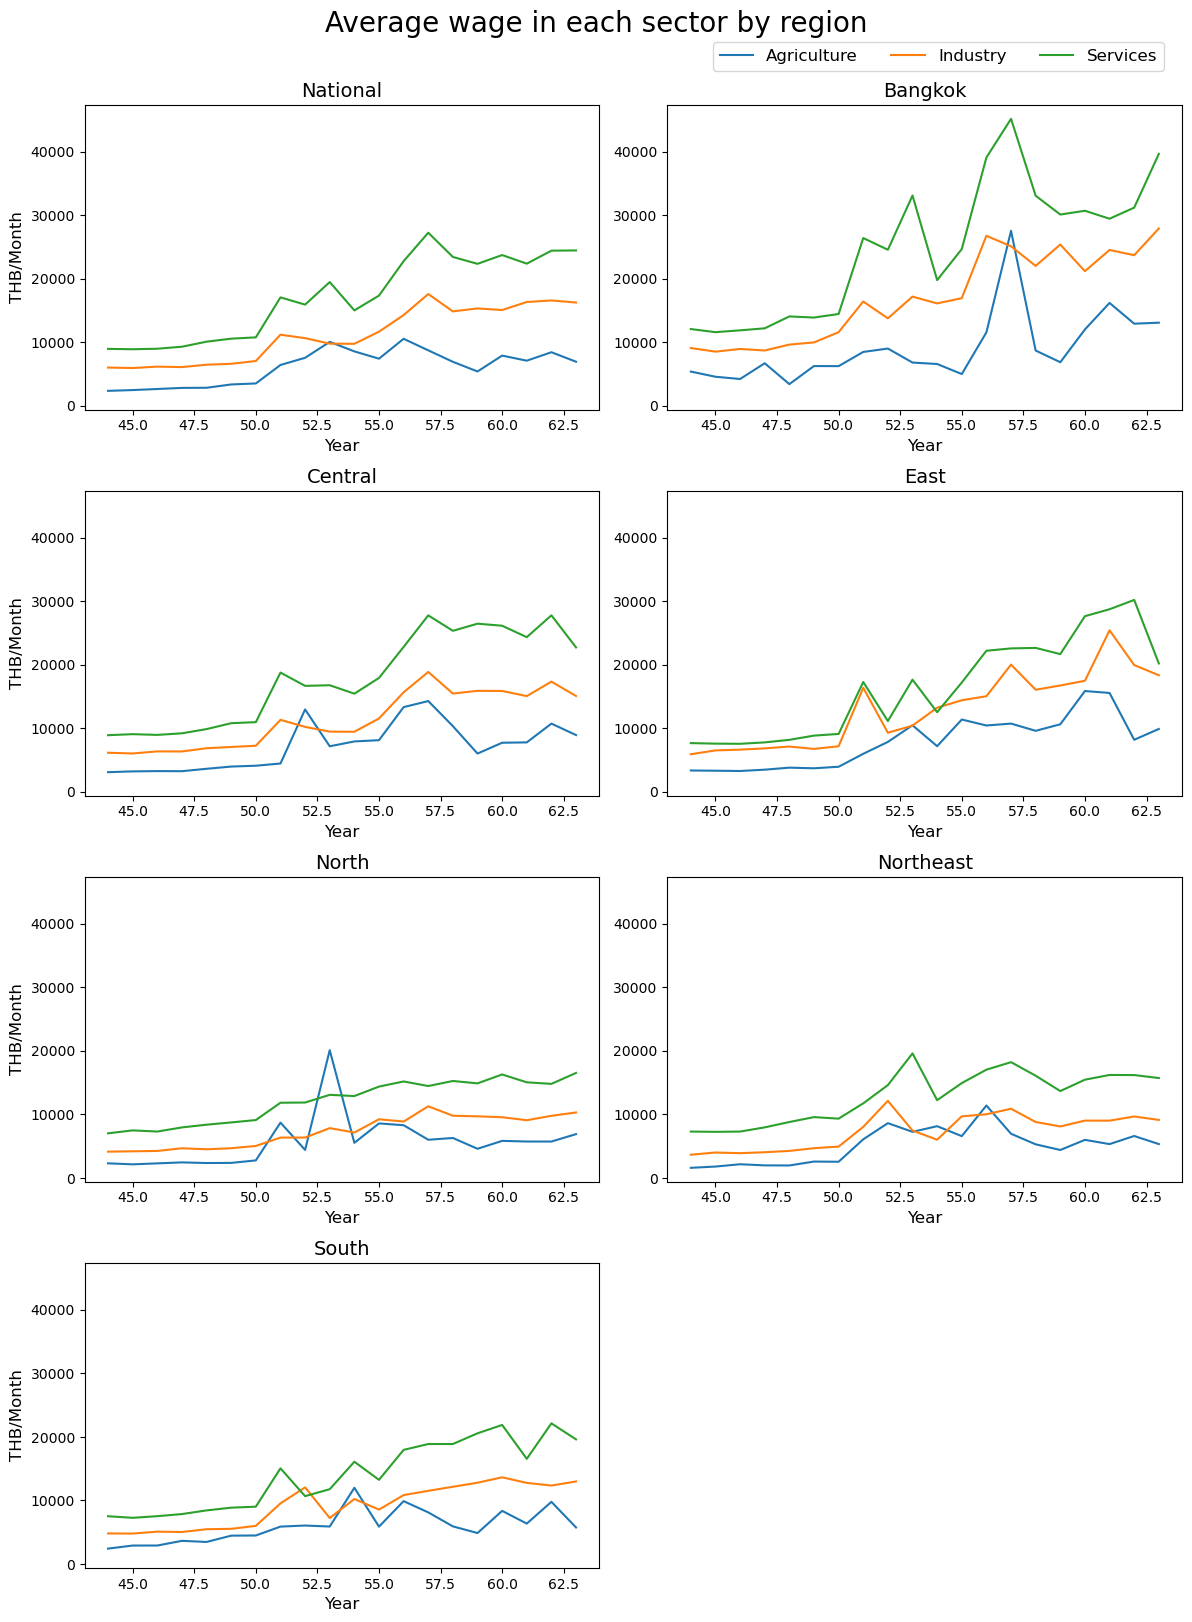

In [ ]:
### Plot the average wage in each sector by year.
fig, axs = plt.subplots(4, 2, figsize=(12, 16), sharey = True)

region_names = ["National", "Bangkok", "Central", "East", "North", "Northeast", "South"]

## Line plot for each sector.
for region, ax in zip(region_names[:-1], axs.ravel()):
    reg_num = region_names.index(region)
    sns.lineplot(data = All_YEAR_WAGE_SEC_annual_final[All_YEAR_WAGE_SEC_annual_final["REG_NEW"] == reg_num], x = "Year", y = "WAGE", hue = "SECTOR", ax = ax, palette = "tab10", legend=False)
    ax.set_title(region, fontsize = 14)
    ax.set_ylabel('THB/Month', fontsize = 12)
    ax.set_xlabel('Year', fontsize = 12)
    ax.yaxis.set_tick_params(labelbottom=True) ## To retain the value labels on the axis.

## Plot region 6.
sns.lineplot(data = All_YEAR_WAGE_SEC_annual_final[All_YEAR_WAGE_SEC_annual_final["REG_NEW"] == 6], x = "Year", y = "WAGE", hue = "SECTOR", ax = axs[3,0], palette = "tab10")
axs[3,0].set_title('South', fontsize = 14)
axs[3,0].set_ylabel('THB/Month', fontsize = 12)
axs[3,0].set_xlabel('Year', fontsize = 12)
axs[3,0].get_legend().remove()
axs[3,0].yaxis.set_tick_params(labelbottom=True)

## Remove the empty subplot.
fig.delaxes(axs[3,1])

## Add main title.
fig.suptitle('Average wage in each sector by region', fontsize = 20, y = 1.01)

## Add a legend.
handles, labels = axs[3,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize = 12, ncols = 3, bbox_to_anchor=(0.98, 0.995))

fig.tight_layout(pad=1.0)


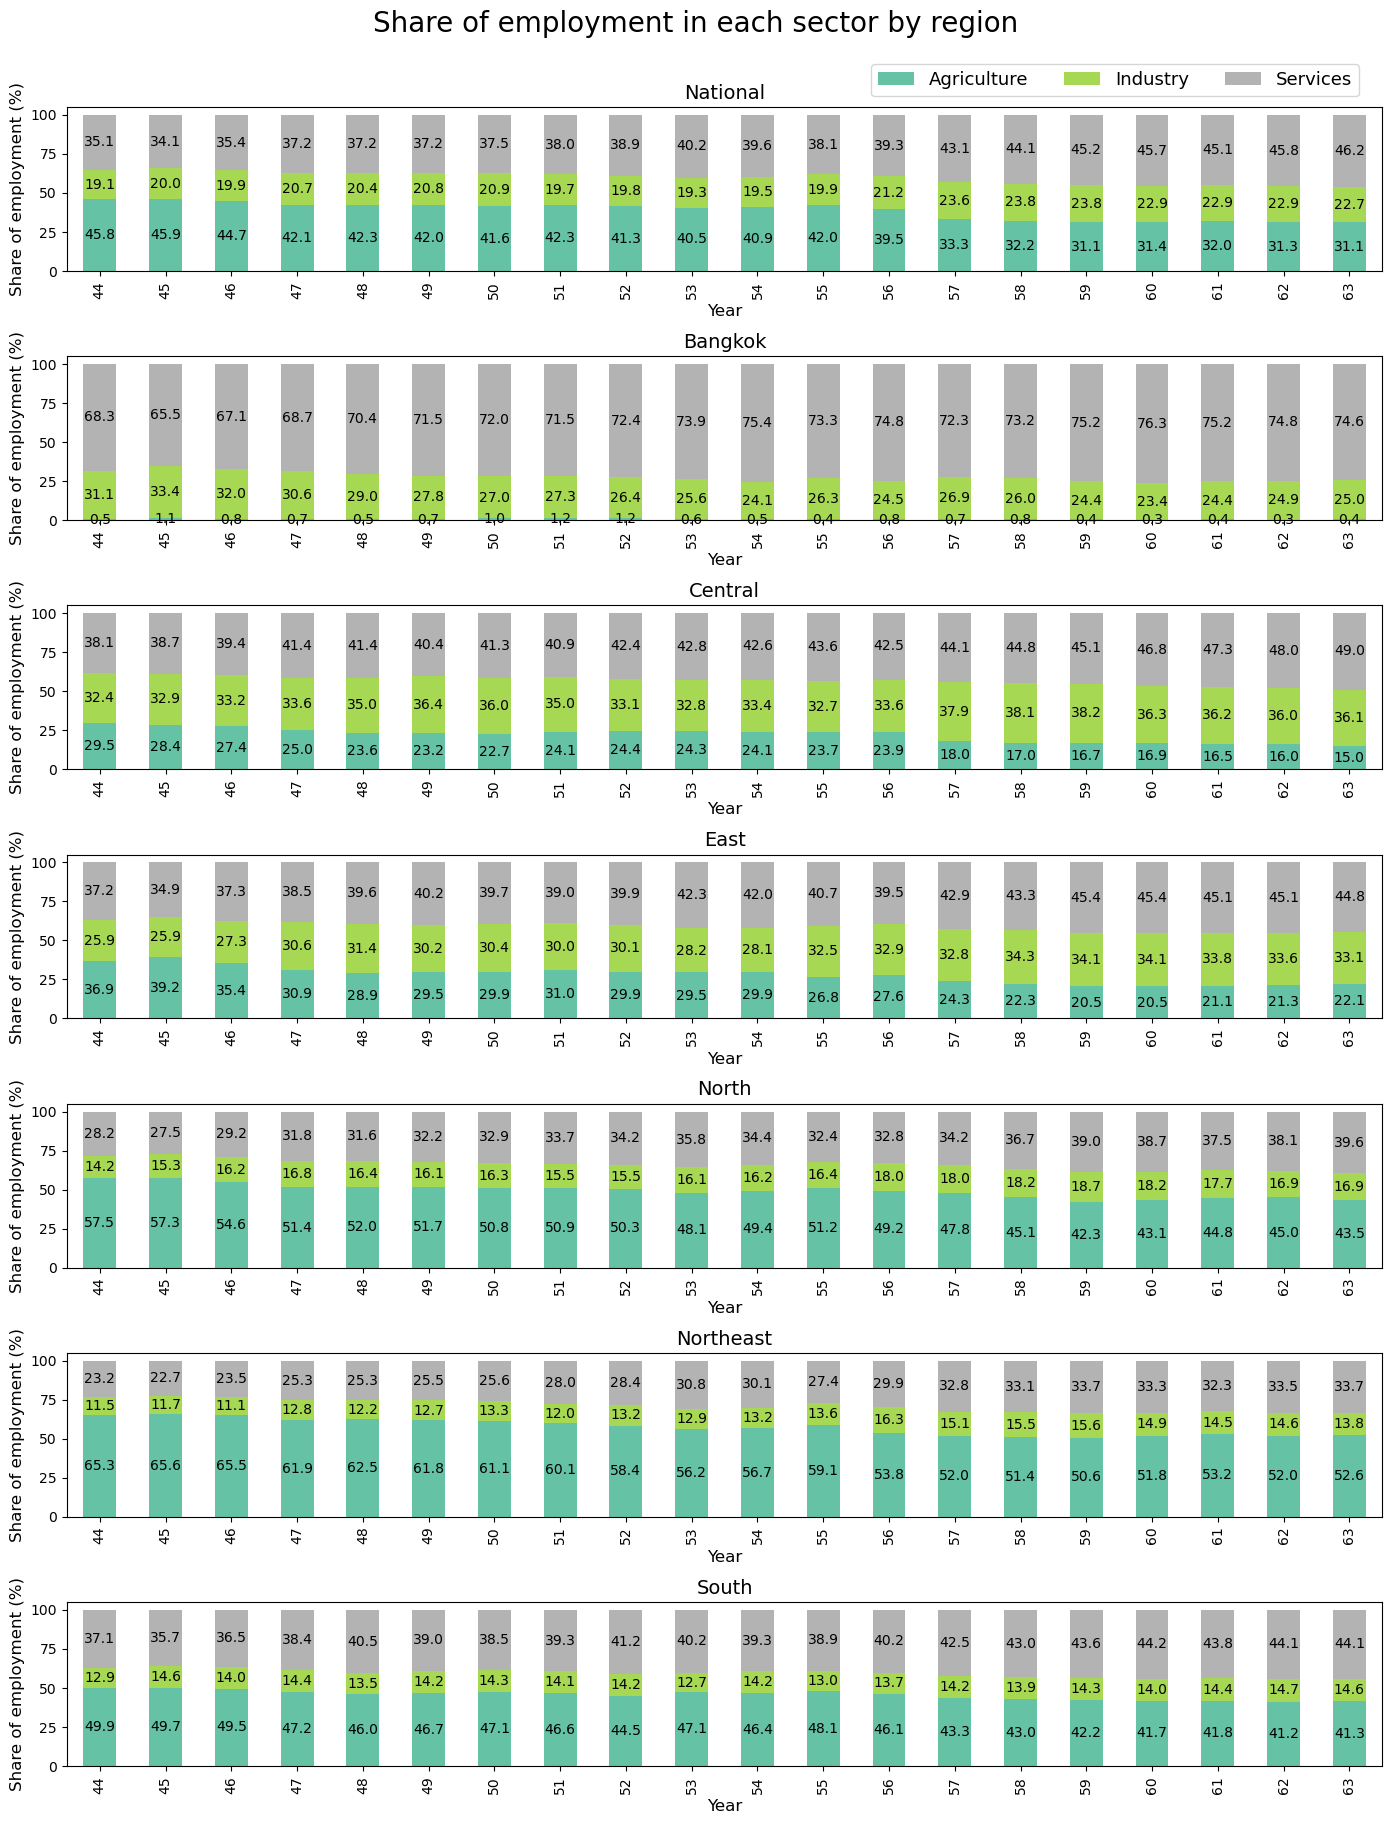

In [ ]:
#### Plot the shares of sectors in each year.
### Each region as a subplot.
fig, axs = plt.subplots(7, 1, figsize=(14, 18))

for ax, region in enumerate(region_names[:-1]):
    # reshape the data to a wide format then Plot
    pd.pivot_table(All_YEAR_ALL_AGE_SEC_annual_pct_final[All_YEAR_ALL_AGE_SEC_annual_pct_final["REG_NEW"] == ax], index = "Year", columns = "SECTOR", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[ax], legend=False, colormap='Set2')
    axs[ax].set_title(region, fontsize = 14)
    axs[ax].set_ylabel('Share of employment (%)', fontsize = 12)
    axs[ax].set_xlabel('Year', fontsize = 12)

    # Add value labels.
    for p in axs[ax].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axs[ax].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center')

## Plot region 6.
pd.pivot_table(All_YEAR_ALL_AGE_SEC_annual_pct_final[All_YEAR_ALL_AGE_SEC_annual_pct_final["REG_NEW"] == 6], index = "Year", columns = "SECTOR", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[6], legend=True, colormap='Set2')
axs[6].set_title('South', fontsize = 14)
axs[6].set_ylabel('Share of employment (%)', fontsize = 12)
axs[6].set_xlabel('Year', fontsize = 12)
axs[6].get_legend().remove()

# Add value labels.
for p in axs[6].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axs[6].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center') # annotate point x y with text.

## Add a legend.
handles, labels = axs[6].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize = 13, ncols = 3, bbox_to_anchor=(0.98, 0.985))

## Add main title.
fig.suptitle('Share of employment in each sector by region', fontsize = 20, y =1.01)

fig.tight_layout(pad=1.0)


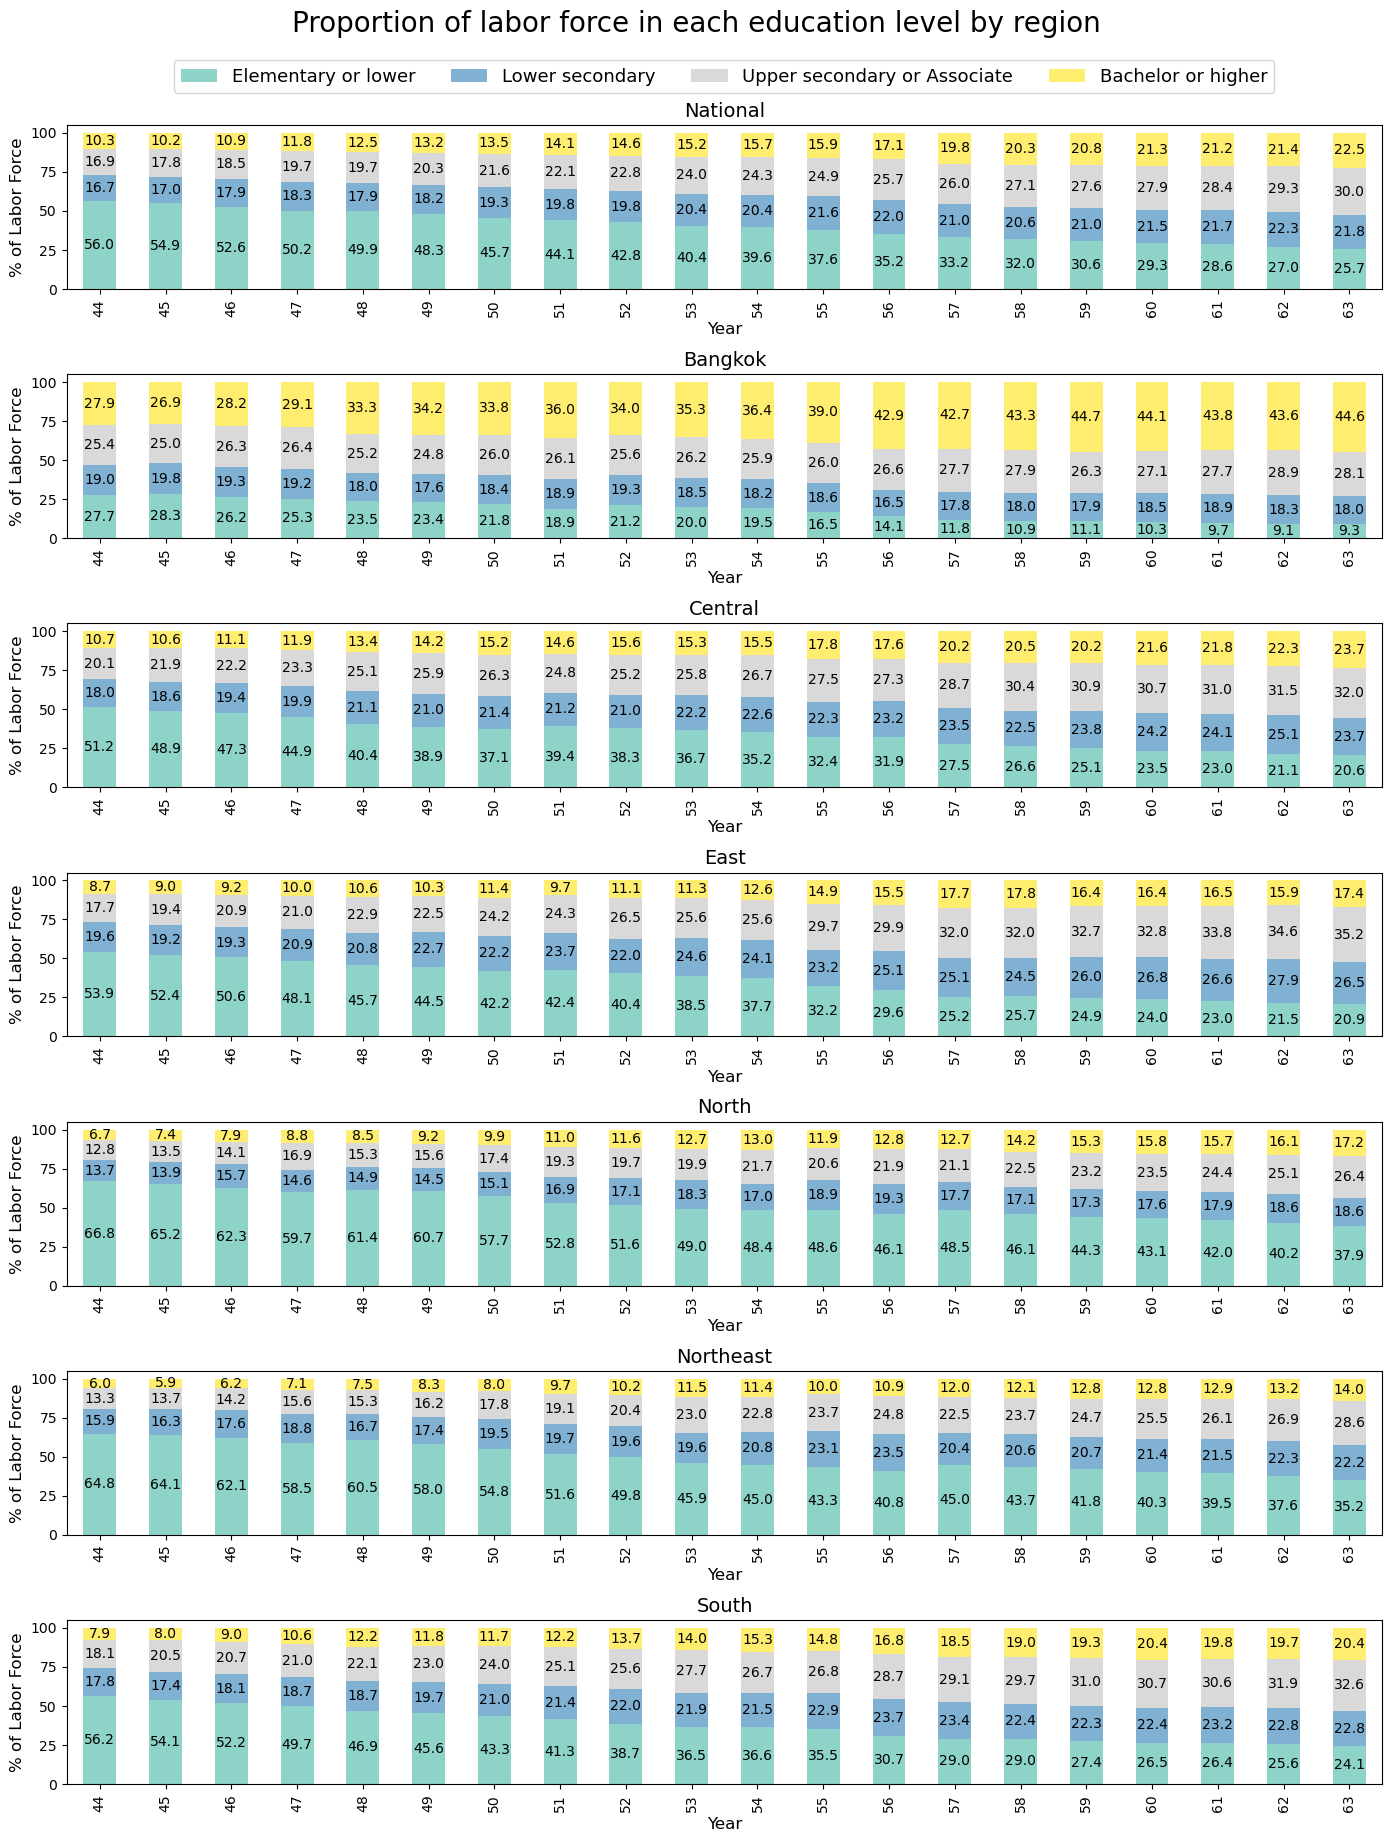

In [ ]:
### Plot education level shares in each year.
### Each region as a subplot.
fig, axs = plt.subplots(7, 1, figsize=(14, 18))

for ax, region in enumerate(region_names[:-1]):
    # reshape the data to a wide format then Plot
    pd.pivot_table(All_YEAR_ALL_AGE_EDU_annual_pct_final[All_YEAR_ALL_AGE_EDU_annual_pct_final["REG_NEW"] == ax], index = "Year", columns = "EDCODE_NEW", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[ax], legend=False, colormap='Set3')
    axs[ax].set_title(region, fontsize = 14)
    axs[ax].set_ylabel('% of Labor Force', fontsize = 12)
    axs[ax].set_xlabel('Year', fontsize = 12)

    # Add value labels.
    for p in axs[ax].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axs[ax].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center')

## Plot region 6.
pd.pivot_table(All_YEAR_ALL_AGE_EDU_annual_pct_final[All_YEAR_ALL_AGE_EDU_annual_pct_final["REG_NEW"] == 6], index = "Year", columns = "EDCODE_NEW", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[6], colormap='Set3')
axs[6].set_title('South', fontsize = 14)
axs[6].set_ylabel('% of Labor Force', fontsize = 12)
axs[6].set_xlabel('Year', fontsize = 12)
axs[6].yaxis.set_tick_params(labelbottom=True)
axs[6].get_legend().remove()

# Add value labels.
for p in axs[6].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axs[6].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center') # annotate point x y with text.

## Add a legend.
handles, labels = axs[6].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize = 13, ncols = 5, bbox_to_anchor=(0.52, 0.997))

## Add main title.
fig.suptitle('Proportion of labor force in each education level by region', fontsize = 20, y = 1.02)

fig.tight_layout(pad=1.0)